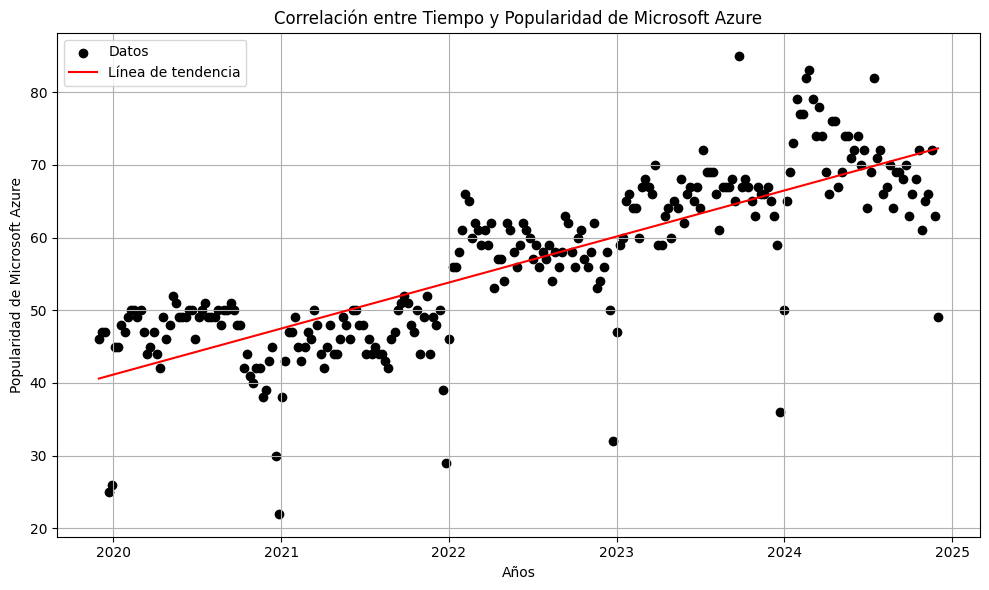

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Importar NumPy para realizar operaciones matemáticas

# Ruta del archivo
file_path = "D:/Documents/complementario-3125033/06-Sesión/Cloud Computing AWS vs Microsoft Azure/AWSyMicrosoftAzure.xlsx"

# Leer el archivo completo
data = pd.read_excel(file_path, header=None)  # No asumimos encabezados, cargamos todo

# Localizar los encabezados reales
headers_row = data[data.iloc[:, 0] == "Semana"].index[0]  # Encuentra la fila donde empieza "Semana"
data.columns = data.iloc[headers_row]  # Usa esa fila como nombres de columna
data = data[headers_row + 1:].reset_index(drop=True)  # Filtra los datos por debajo de los encabezados
data.columns.name = None  # Limpia el nombre del índice de columnas

# Extraer columnas relevantes
semanas = pd.to_datetime(data['Semana'], errors='coerce')  # Convertir la columna 'Semana' a datetime
azure = pd.to_numeric(data['Microsoft Azure'], errors='coerce')  # Aseguramos conversión numérica

# Graficar los datos de Microsoft Azure
plt.figure(figsize=(10, 6))
plt.scatter(semanas, azure, label='Datos', color='black')  # Graficar puntos individuales

# Calcular la línea de tendencia
z = np.polyfit(semanas.index, azure, 1)  # Ajustar línea de tendencia
p = np.poly1d(z)
plt.plot(semanas, p(semanas.index), label='Línea de tendencia', color='red')  # Línea de tendencia

# Personalización del gráfico
plt.xlabel('Años')
plt.ylabel('Popularidad de Microsoft Azure')
plt.title('Correlación entre Tiempo y Popularidad de Microsoft Azure')
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()